# MATH 441 Optimization Problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.optimize import linprog
import pandas as pd

## Graphs

* A **graph** is a pair $(V,E)$ where $V$ is a set of **nodes** and $E$ is a set of **edges**
* Enumerate the nodes such that each node has an index $i$
* An edge is a line which connects a pair of nodes
* An edge $e$ which connects nodes $i$ and $j$ is represented by the pair of indices $e = (i,j)$
* A **directed graph** is a graph where the edges are ordered pairs $(i,j)$ such that the edge is drawn from $i$ to $j$
* A **network** is a connected, directed graph

Represent a directed graph by the **node-arc incidence matrix** $A = [a_{ij}]$ where:

* $a_{ik} = 1$ if edge $k$ ends at node $i$ ($e_k = (j,i)$)
* $a_{ik} = -1$ if edge $k$ begins at node $i$ ($e_k = (i,j)$)
* $a_{ik} = 0$ otherwise

In other words:

* columns of $A$ correspond to edges
* rows of $A$ correspond to nodes
* each column has 1 and -1 and all other entries 0
* if $e_k = (i,j)$ then column $k$ has 1 in row $j$ and -1 in row $i$

## Example

Use the function `nx.incidence_matrix` to generate the incidence matrix. By default it is sparse matrix. Use the method `toarray()` to create dense array.

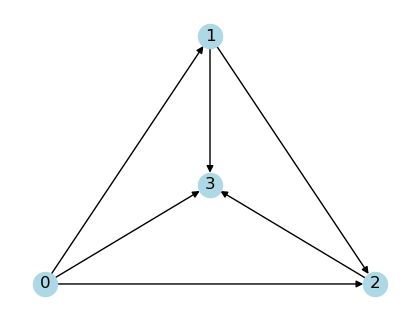

In [2]:
nodes = [0,1,2,3]
coordinates = [(0,0),(0.5,1),(1,0),(0.5,0.4)]
edges = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
plt.figure(figsize=(4,3))
nx.draw(G,pos=coordinates,with_labels=True,node_color='lightblue')

In [3]:
A = nx.incidence_matrix(G,oriented=True).toarray()

/var/folders/2h/25vcwmr52mvfqs1h92028rph0000gn/T/ipykernel_71578/2531804110.py:1: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.incidence_matrix(G,oriented=True).toarray()


In [4]:
A

array([[-1., -1., -1.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -1., -1.,  0.],
       [ 0.,  1.,  0.,  1.,  0., -1.],
       [ 0.,  0.,  1.,  0.,  1.,  1.]])

## Network Flows

Let $G = (V,E)$ be a **network**. Enumerate the nodes such that each node is assigned an index $i$ from $0$ to $m-1$ where $m = |V|$ is the total number of nodes. Enumerate the edges such that each edge is assigned an index $k$ from $0$ to $n-1$ where $n = |E|$ is the total number of edges. That is, $E = \{ e_0, e_1, \dots, e_{n-1} \}$. Write $e_k = (i_k,j_k)$ for each edge to show that edge $k$ goes from node $i_k$ to node $j_k$.

Each node is assigned a **supply/demand** value $b_i$. We **assume** the total supply is equal to the total demand $\sum_i b_i = 0$. If $b_i > 0$ then node $i$ is a **source** with **supply** $b_i$, if $b_i < 0$ then node $i$ is a **sink** with **demand** $b_i$, and if $b_i = 0$ then node $i$ is a **shipping** node. Let $\mathbf{b}$ be the **supply constraint** vector. Note that $\mathbf{b}$ has length $m$.

Let $c_k$ be the **cost** to ship a unit of product along the edge $e_k$ from node $i_k$ to node $j_k$. Let $x_k$ be the total **flow** of product from node $i$ to node $j$ along the edge $e_k = (i,j)$. The **network flow** is the vector $\mathbf{x}$. The **cost** of the flow is

$$
\sum_k c_k x_k
$$

The **balance equation** at each node specifies that the flow into a node minus the flow out is equal to the supply/demand at the node. The balance equation at node $i$ is:

$$
\sum_{e_k = (j,i)} x_k - \sum_{e_k = (i,j)} x_k = -b_i \ , \ \ i=0,\dots,m-1
$$

Let $A$ be the matrix of the balance equations such that $A \mathbf{x} = -\mathbf{b}$. The matrix $A = [a_{ij}]$ is the **node-arc incidence matrix**.

Let $u_k$ be the flow **capacity** of the edge $e_k = (i,j)$ connecting node $i$ and node $j$. The network flow $\mathbf{x}$ is subject to the constraint $0 \leq x_k \leq u_k$ for each edge $e_k$.

$$
0 \leq x_k \leq u_k \ , \ \ k=0,\dots,n-1
$$

## Example

Let's try to recreate the network flow in Figure 14.12 in Vanderbei p.242.

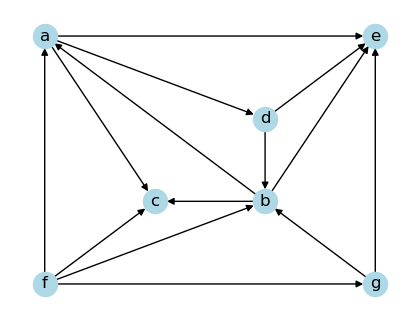

In [5]:
nodes = ['a','b','c','d','e','f','g']
coordinates = {'a':(0,3),'b':(2,1),'c':(1,1),'d':(2,2),'e':(3,3),'f':(0,0),'g':(3,0)}
edges = [('a','c'),('a','d'),('a','e'),('b','a'),('b','c'),('b','e'),('d','b'),
         ('d','e'),('f','a'),('f','b'),('f','c'),('f','g'),('g','b'),('g','e')]
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
plt.figure(figsize=(4,3))
nx.draw(G,pos=coordinates,with_labels=True,node_color='lightblue')

In [6]:
A = nx.incidence_matrix(G,oriented=True).toarray()

/var/folders/2h/25vcwmr52mvfqs1h92028rph0000gn/T/ipykernel_71578/2531804110.py:1: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.incidence_matrix(G,oriented=True).toarray()


In [7]:
print(A)

[[-1. -1. -1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1. -1. -1.  1.  0.  0.  1.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0. -1. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1. -1.]]


In [8]:
G.nodes

NodeView(('a', 'b', 'c', 'd', 'e', 'f', 'g'))

In [9]:
b = np.array([0,0,-6,-6,-2,9,5])

In [10]:
c = np.array([48,28,10,7,65,7,38,15,56,48,108,24,33,19])

In [11]:
result = linprog(c,A_eq=A,b_eq=-b)

In [12]:
result.x

array([ 6.,  6.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,  3.,
        2.])

In [13]:
for k in range(len(edges)):
    print("Flow along edge",edges[k],"is",result.x[k])

Flow along edge ('a', 'c') is 6.0
Flow along edge ('a', 'd') is 6.0
Flow along edge ('a', 'e') is 0.0
Flow along edge ('b', 'a') is 12.0
Flow along edge ('b', 'c') is 0.0
Flow along edge ('b', 'e') is 0.0
Flow along edge ('d', 'b') is 0.0
Flow along edge ('d', 'e') is 0.0
Flow along edge ('f', 'a') is 0.0
Flow along edge ('f', 'b') is 9.0
Flow along edge ('f', 'c') is 0.0
Flow along edge ('f', 'g') is 0.0
Flow along edge ('g', 'b') is 3.0
Flow along edge ('g', 'e') is 2.0


## Maximum Flow

Choose one source node $s$ and one target node $t$. Set the demand $b_i = 0$ for all nodes except $s$ and $t$. Choose an upper bound (capacity) for the flow along each edge $k$. Find the maximum supply into node $s$ that can flow through the newtork to node $t$. In other words, let $s$ have index 0, let $t$ have index $m-1$ and maximize the flow out

$$
\sum_{e_k=(0,j)} x_k
$$

subject to the capacity constraints

$$
0 \leq x_k \leq u_k \ , \ \ k=0,\dots,n-1
$$

and the balance equations for each node **except** the source and target nodes

$$
\sum_{e_k = (j,i)} x_k - \sum_{e_k = (i,j)} x_k = 0 \ , \ \ i=1,\dots,m-2
$$


## Example

In [27]:
nodes = pd.read_csv("stations.csv",index_col=0)

In [28]:
nodes.head()

,name,x,y
index,,,
0,Downtown,-123.121405,49.280311
1,HastingsClark,-123.077084,49.281288
2,BoundaryHastings,-123.023351,49.281132
3,MainTerminal,-123.099939,49.272719
4,Clark1st,-123.077314,49.269678


In [29]:
edges = pd.read_csv("routes.csv")

In [30]:
edges.head()

,from,to
0,5,2
1,5,4
2,5,12
3,2,5
4,2,1


In [31]:
G = nx.DiGraph()

In [32]:
G.add_nodes_from(nodes.index)

In [33]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24))

Use the `.add_edge` method so that we can include a `capacity` attribute to each edge.

In [34]:
for i in edges.index:
    source = edges.iloc[i,0]
    target = edges.iloc[i,1]
    G.add_edge(source,target,capacity=10)

In [35]:
coordinates = []
for i in nodes.index:
    x = nodes.iloc[i,1]
    y = nodes.iloc[i,2]
    coordinates.append((x,y))

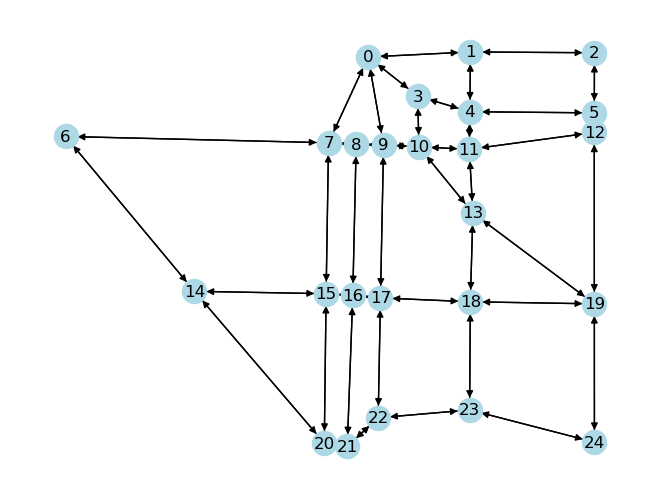

In [36]:
nx.draw(G,pos=coordinates,
        with_labels=True,
        node_color='lightblue')

In [37]:
A = nx.incidence_matrix(G,oriented=True).toarray()
A1 = A[1:-1,:]
b1 = np.zeros(A1.shape[0])
c1 = (A[0,:] - np.abs(A[0,:]))/2

/var/folders/2h/25vcwmr52mvfqs1h92028rph0000gn/T/ipykernel_71578/302284512.py:1: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.incidence_matrix(G,oriented=True).toarray()


In [38]:
c1

array([-1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

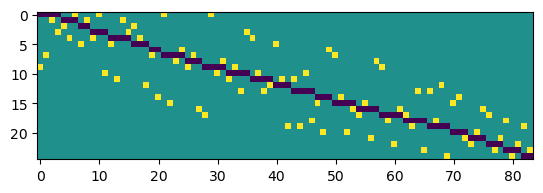

In [41]:
plt.imshow(A)

In [45]:
edges

,from,to
0,5,2
1,5,4
2,5,12
3,2,5
4,2,1
...,...,...
79,8,9
80,8,7
81,8,16
82,6,7


In [35]:
max_flow,flow_dict = nx.maximum_flow(G,18,0)

In [36]:
max_flow

40

In [37]:
flow_dict

{0: {9: 0, 7: 0, 1: 0, 3: 0},
 1: {2: 0, 4: 0, 0: 10},
 2: {5: 0, 1: 0},
 3: {4: 0, 0: 10, 10: 0},
 4: {5: 0, 11: 0, 1: 10, 3: 0},
 5: {2: 0, 4: 0, 12: 0},
 6: {7: 0, 14: 0},
 7: {0: 10, 15: 0, 8: 0, 6: 0},
 8: {9: 0, 7: 10, 16: 0},
 9: {17: 0, 0: 10, 10: 0, 8: 0},
 10: {11: 0, 9: 0, 13: 0, 3: 10},
 11: {4: 10, 10: 0, 13: 0, 12: 0},
 12: {5: 0, 11: 0, 19: 0},
 13: {11: 10, 19: 0, 10: 10, 18: 0},
 14: {15: 0, 20: 0, 6: 0},
 15: {7: 0, 14: 0, 20: 0, 16: 0},
 16: {17: 0, 15: 0, 21: 0, 8: 10},
 17: {9: 10, 18: 0, 22: 0, 16: 10},
 18: {17: 10, 19: 10, 13: 10, 23: 10},
 19: {13: 10, 18: 0, 12: 0, 24: 0},
 20: {15: 0, 14: 0, 21: 0},
 21: {22: 0, 20: 0, 16: 0},
 22: {17: 10, 23: 0, 21: 0},
 23: {18: 0, 24: 0, 22: 10},
 24: {19: 0, 23: 0}}

## Shortest Path

In [39]:
nx.shortest_path(G,6,2)

[6, 7, 0, 1, 2]